In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# 금융데이터

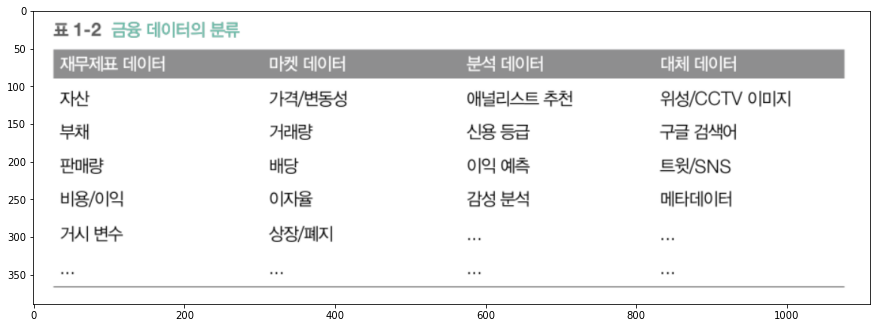

In [9]:
im = plt.imread('./data/KakaoTalk_20220513_171811021.png') 
plt.figure(figsize =(15,20))
plt.imshow(im) 
plt.show()

#  대체 데이터를 제외한 데이터들을 전통적 금융 데이터라고 지칭함. 

# 바이앤 홀드 전략 
- 주식을 매수한 후 장기 보유하는 투자 전략 
    - 즉 매수하려는 종목이 충분히 저가라고 판단될 때 주기적으로 매수한 후 장기간 보유하는 식으로 투자하는 방법임.
    - 매수한 종목의 가격이 충분히 올랐다고 판단될 때 매도함. 
    - 경제가 성장함에 따라 장기적으로 우상향한다는 투자 철학의 관점에 기반함.

In [11]:
# 가격데이터 불러오기 
import FinanceDataReader as fdr 
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [12]:
df_krx[df_krx['Name'] == '삼성전자']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3867,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"한종희, 경계현",http://www.sec.co.kr,경기도


In [ ]:
df_samsung = fdr.DataReader('005930','1997')

## 결측치

In [26]:
# 결측치가 하나라도있으면 뽑아보는것 
df_samsung[df_samsung.isin([np.nan,np.inf,-np.inf]).any(1)]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-03-20,1488,1512,1485,1489,247310,NaN


In [ ]:
df_samsung.dropna(inplace=True)

## 데이터 슬라이싱

In [29]:
price_df = df_samsung[['Close']]

<AxesSubplot:xlabel='Date'>

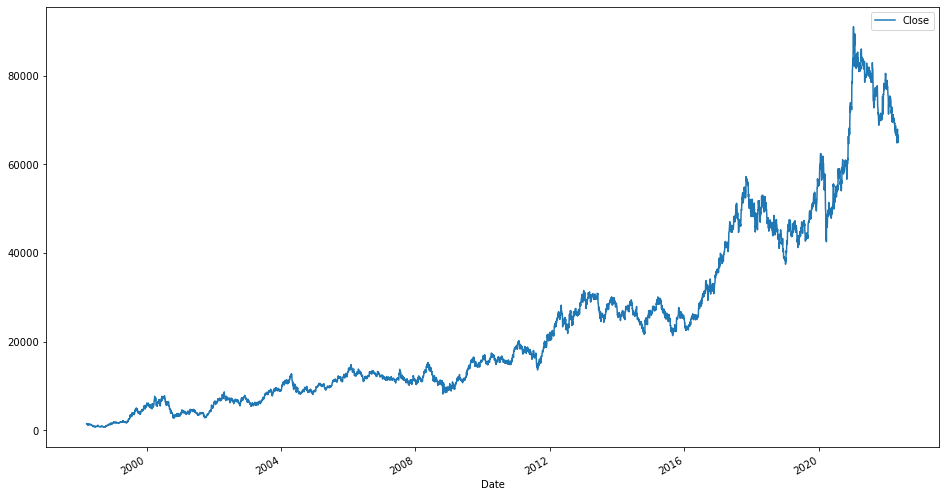

In [33]:
# 종가 그래프 
price_df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Date'>

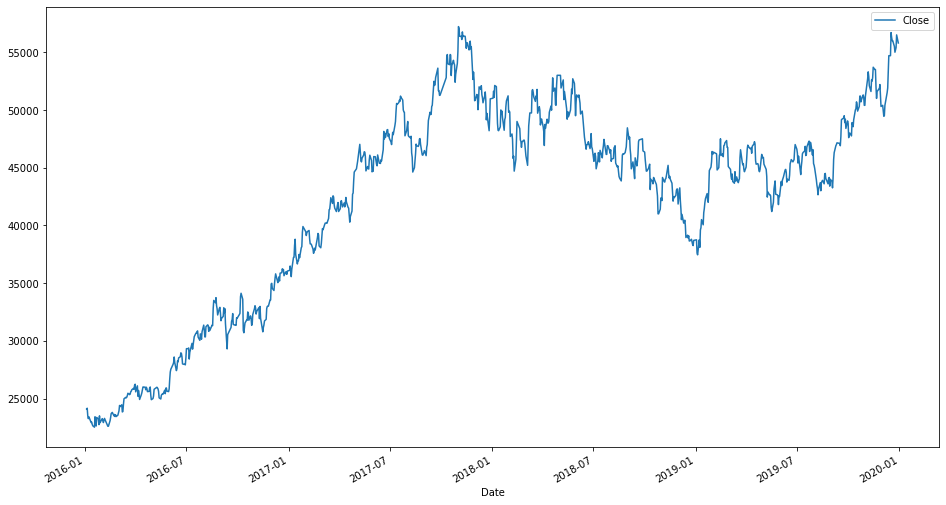

In [34]:
from_date = '2016-01-01'
to_date = '2020-01-01'
price_df.loc[from_date:to_date].plot(figsize=(16,9))

In [ ]:
# 한때 최고점 대비 현재까지 하락한 비율 중 최대 하락율 = 최대 낙폭(MDD)

## 일별 수익률 계산 
- 매수한 시점부터 매도한 시점까지 보유
    - 일별 수익률을 누적곱하면 최종적으로 매수한 시점 대비 매도한 시점의 종가 수익률로 계산됨

In [35]:
price_df['daily_rtn'] = price_df['Close'].pct_change()
price_df

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_3292/419572814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['daily_rtn'] = price_df['Close'].pct_change()


,Close,daily_rtn
Date,,
1998-03-21,1443,NaN
1998-03-23,1396,-0.032571
1998-03-24,1380,-0.011461
1998-03-25,1398,0.013043
1998-03-26,1367,-0.022175
...,...,...
2022-05-09,66100,-0.006015
2022-05-10,65700,-0.006051
2022-05-11,65700,0.000000


In [36]:
# 누적곱 계산 
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_3292/688395754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()


,Close,daily_rtn,st_rtn
Date,,,
1998-03-21,1443,NaN,NaN
1998-03-23,1396,-0.032571,0.967429
1998-03-24,1380,-0.011461,0.956341
1998-03-25,1398,0.013043,0.968815
1998-03-26,1367,-0.022175,0.947332
...,...,...,...
2022-05-09,66100,-0.006015,45.807346
2022-05-10,65700,-0.006051,45.530146
2022-05-11,65700,0.000000,45.530146


<AxesSubplot:xlabel='Date'>

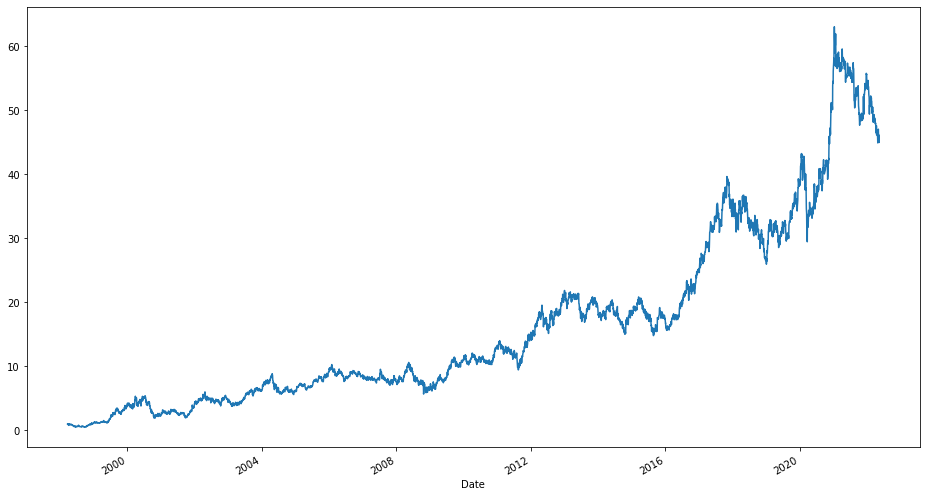

In [37]:
price_df['st_rtn'].plot(figsize=(16,9))

In [ ]:
# 다른시점으로 수익률 계산 
base_date = ''